In [1]:
# 03_Churn_Model.ipynb

# ---- STEP 1: IMPORT LIBRARIES ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:

# ---- STEP 2: LOAD DATA ----
df = pd.read_csv(r"C:\Users\acer\Downloads\archive (10)\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# ---- STEP 3: CLEAN DATA ----
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["MonthlyCharges"] * df["tenure"], inplace=True)
df = df[df["tenure"] > 0]
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

C:\Users\acer\AppData\Local\Temp\ipykernel_25184\3762356026.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["MonthlyCharges"] * df["tenure"], inplace=True)


In [4]:

# Drop customerID (not useful for model)
df.drop("customerID", axis=1, inplace=True)

In [5]:
# ---- STEP 4: ENCODE CATEGORICAL VARIABLES ----
cat_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [6]:
# ---- STEP 5: FEATURE SCALING ----
scaler = StandardScaler()
scaled_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [7]:
# ---- STEP 6: TRAIN-TEST SPLIT ----
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [8]:

# ---- STEP 7: TRAIN LOGISTIC REGRESSION ----
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# ---- STEP 8: EVALUATE MODEL ----
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1291
           1       0.64      0.57      0.60       467

    accuracy                           0.80      1758
   macro avg       0.74      0.73      0.73      1758
weighted avg       0.79      0.80      0.80      1758

ROC AUC Score: 0.8376463973116468


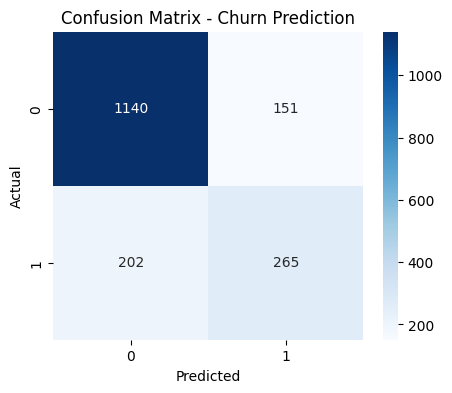

In [11]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Churn Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

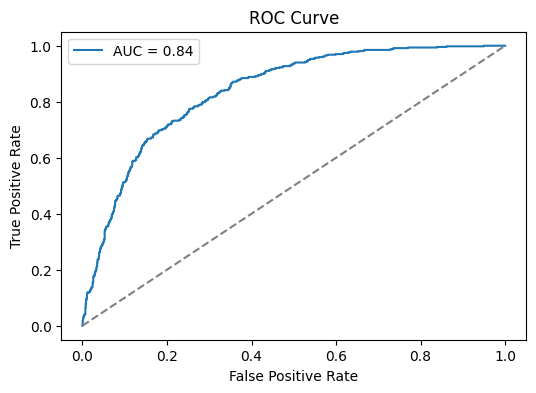

In [12]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1],[0,1],'--',color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_25184\1739315087.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(10), x="Importance", y="Feature", palette="viridis")


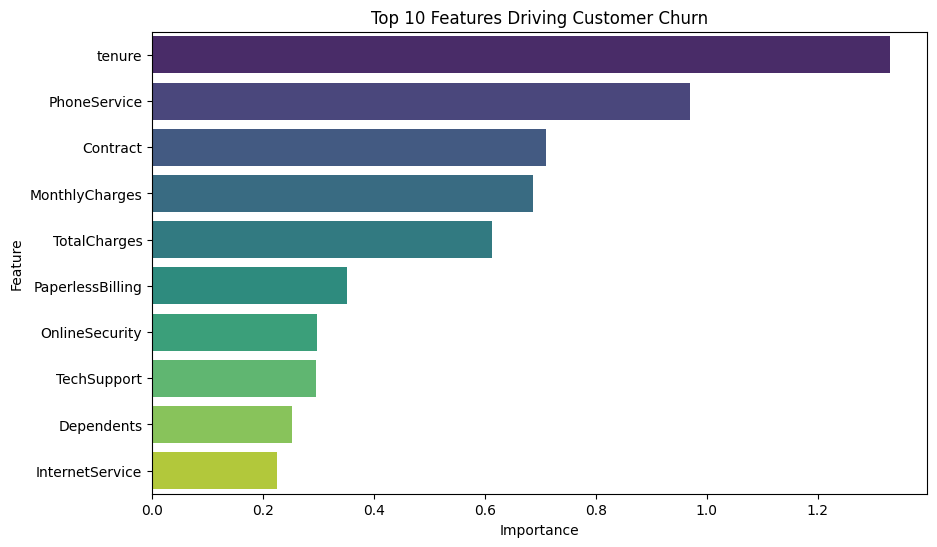

,Feature,Importance
4,tenure,1.330540
5,PhoneService,0.970620
14,Contract,0.710358
17,MonthlyCharges,0.687290
18,TotalCharges,0.612974
15,PaperlessBilling,0.350861
8,OnlineSecurity,0.296862
11,TechSupport,0.295826
3,Dependents,0.252141
7,InternetService,0.225211


In [13]:
# ---- STEP 9: FEATURE IMPORTANCE ----
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": abs(log_reg.coef_[0])
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Features Driving Customer Churn")
plt.show()

feature_importance.head(10)